# Multiple Linear Regression

Multiple Linear Regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## In this notebook the dataset is used is based on advertising dataset

df = pd.read_csv("advertising.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visulaizing data

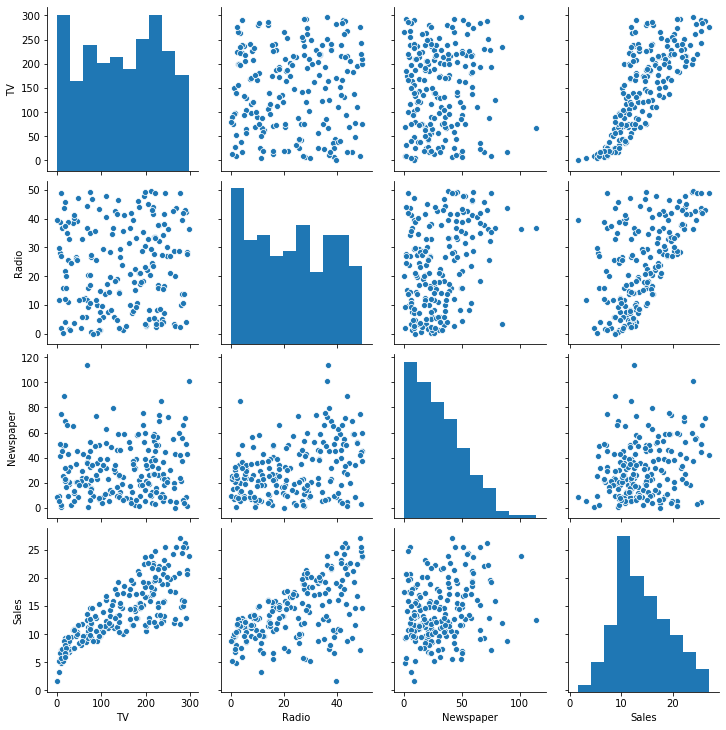

In [6]:
sns.pairplot(df)

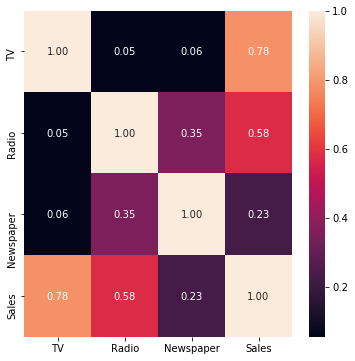

In [7]:
corr_mat = df.corr()

fig,ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(corr_mat,
                 annot = True,
                 fmt = ".2f")

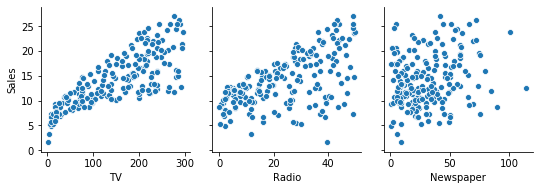

In [8]:
# visulaize the relationship between the features and the response using scatterplot

sns.pairplot(df,x_vars = ["TV","Radio","Newspaper"],y_vars = "Sales")

# Spliting the data into training set and testing set

In [9]:
#putting feature variable to x
X = df[["TV","Radio","Newspaper"]]

#putting response variable to y
y = df["Sales"]

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =23)

# Performing Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
#fit the model to training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [15]:
#print the intercept
print(lm.intercept_)

3.016007620011095


In [16]:
# find the coefficient

coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns = ["Coeffiecient"])
coeff_df

,Coeffiecient
TV,0.045819
Radio,0.177275
Newspaper,0.000854


# Prediction

In [17]:
#making prediction using the model

y_pred = lm.predict(X_test)

# Calculating Error Terms

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [19]:
print("mean squared error :",mse)
print("r_squared error :",r2)

mean squared error : 2.586337457336069
r_squared error : 0.9266842516167633


# Checking P value using Statmodels

In [20]:
import statsmodels.api as sm

In [21]:
X_train_sm = X_train

X_train_sm = sm.add_constant(X_train_sm)

lm_1 = sm.OLS(y_train,X_train_sm).fit()

In [22]:
lm_1.params

const        3.016008
TV           0.045819
Radio        0.177275
Newspaper    0.000854
dtype: float64

In [23]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     317.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           3.48e-61
Time:                        01:56:57   Log-Likelihood:                -273.76
No. Observations:                 140   AIC:                             555.5
Df Residuals:                     136   BIC:                             567.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0160      0.407      7.402      0.0

In this dataset Newspaper is insignificant

In [24]:
#removing newspaper from dataset

X_train_new = X_train[["TV","Radio"]]
X_test_new = X_test[["TV","Radio"]]

In [25]:
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#making predictions
y_pred_new = lm.predict(X_test_new)

In [27]:
mse_s = mean_squared_error(y_test,y_pred_new)
r_2 = r2_score(y_test,y_pred_new) 

In [28]:
print("mse :",mse_s)
print("R suqare :",r_2)

mse : 2.5822848146105293
R suqare : 0.9267991331970884


Text(0, 0.5, 'Sales')

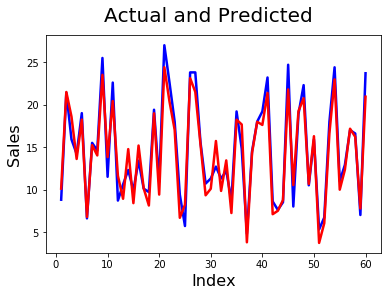

In [29]:
#Actual vs Predicted

c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,color = "blue",linewidth = 2.5,linestyle = "-")
plt.plot(c,y_pred,color = "red",linewidth = 2.5,linestyle = "-")
fig.suptitle("Actual and Predicted",fontsize = 20)
plt.xlabel("Index",fontsize = 16)
plt.ylabel("Sales",fontsize = 16)

Text(0, 0.5, 'y_test-y_pred')

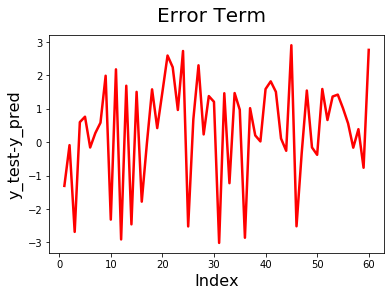

In [30]:
#Error term

c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color = "red",linewidth = 2.5,linestyle = "-")
fig.suptitle("Error Term",fontsize = 20)
plt.xlabel("Index",fontsize = 16)
plt.ylabel ("y_test-y_pred",fontsize = 16)